In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = '/content/BBDD ONSV - SINIESTROS 2021-2022(SINIESTROS).csv'

# Definir la función de carga y limpieza de datos
def load_and_clean_data(file_path):
    data = pd.read_csv(file_path, encoding='ISO-8859-1')
    data = data.drop([0, 1])  # Eliminar las filas superiores no necesarias
    data.columns = data.iloc[0]  # Establecer la tercera fila como encabezados de columna
    data = data.drop([2])  # Eliminar la fila de encabezados duplicada
    data.reset_index(drop=True, inplace=True)

    # Limpiar y preparar datos
    data.drop(['CÓDIGO SINIESTRO', 'FECHA SINIESTRO', 'HORA SINIESTRO', 'COORDENADAS LATITUD', 'COORDENADAS  LONGITUD'], axis=1, inplace=True)
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].fillna('Desconocido')
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
        else:
            data[col] = data[col].fillna(data[col].mean())

    # Definimos 'Gravedad'
    data['Gravedad'] = data['CANTIDAD DE FALLECIDOS'] + data['CANTIDAD DE LESIONADOS'] * 0.5
    data['Gravedad'] = pd.cut(data['Gravedad'], bins=[0, 1, 3, float('inf')], labels=['leve', 'moderado', 'grave'], right=False)

    return data

data = load_and_clean_data(file_path)

**1.   ¿De qué forma se utilizan los algoritmos de aprendizaje automático para predecir la gravedad de los accidentes de tráfico y cuáles son las implementaciones más recientes del Random Forest en investigaciones?**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       grave       1.00      1.00      1.00       297
        leve       1.00      1.00      1.00      1159
    moderado       0.00      0.00      0.00         1

    accuracy                           1.00      1457
   macro avg       0.67      0.67      0.67      1457
weighted avg       1.00      1.00      1.00      1457



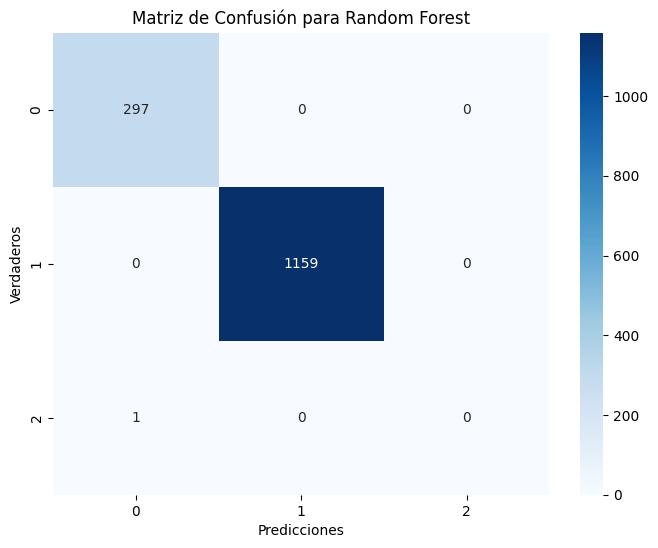

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Preparar los datos para el modelo
X = data.drop('Gravedad', axis=1)
y = data['Gravedad']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realización de predicciones y generación del reporte
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))

# Visualización de la matriz de confusión
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusión para Random Forest")
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()



**2.    ¿Cómo se ha aplicado la regresión lineal en el análisis de accidentes de tráfico y cuáles son sus limitaciones?**



In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preparar el codificador para las variables categóricas
column_transformer = ColumnTransformer(
    [('cat', OneHotEncoder(), ['CONDICIÓN CLIMÁTICA'])],
    remainder='passthrough')

# Asumiendo que las columnas relevantes ya están codificadas adecuadamente
features = ['CANTIDAD DE VEHICULOS DAÑADOS', 'CONDICIÓN CLIMÁTICA']  # Ajustar según los datos
target = 'CANTIDAD DE LESIONADOS'

# Preparar datos para el modelo
X = data[features]
y = data[target]

# Aplicar codificación OneHot a las variables categóricas
X_transformed = column_transformer.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")



Mean Squared Error: 36.403382852224105
R^2 Score: 0.006130916973192346
